In [ ]:
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
!pip install -r requirements.txt

In [ ]:
%cd /content/yolov7
!wget "https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt"

In [ ]:
%cd /content/yolov7
!python train.py --batch 16 --cfg cfg/training/yolov7.yaml --epochs 200 --data /content/drive/MyDrive/imzaTestTrainData/labels/ --weights "yolov7.pt" --device 0

/content/yolov7
Traceback (most recent call last):
  File "train.py", line 587, in <module>
    opt.data, opt.cfg, opt.hyp = check_file(opt.data), check_file(opt.cfg), check_file(opt.hyp)  # check files
  File "/content/yolov7/utils/general.py", line 151, in check_file
    assert len(files), f'File Not Found: {file}'  # assert file was found
AssertionError: File Not Found: /content/drive/MyDrive/imzaTestTrainData/labels/


In [7]:
#import torch
torch.cuda.is_available()

True

In [7]:
!python detect.py --weights best_imza.pt --conf 0.4 --source inference/images/imza1.png

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='inference/images/imza1.png', update=False, view_img=False, weights=['best_imza.pt'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36490696 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 imza, Done. (18.6ms) Inference, (19.1ms)

In [8]:
import os
os.chdir("drive/MyDrive/yolov7")
!pwd

FileNotFoundError: ignored

In [6]:
import os
os.chdir("/content/drive/MyDrive/yolov7")
os.getcwd()

'/content/drive/MyDrive/yolov7'

In [7]:
#!# Download YOLOv7 code
#!git clone https://github.com/WongKinYiu/yolov7
#%cd yolov7
from pathlib import Path
import torch

from models.yolo import Model
from utils.general import check_requirements, set_logging
from utils.google_utils import attempt_download
from utils.torch_utils import select_device

dependencies = ['torch', 'yaml']
check_requirements(Path(".").parent / 'requirements.txt', exclude=('pycocotools', 'thop'))
set_logging()



requirements: jedi>=0.10 not found and is required by YOLOR, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.3 MB/s eta 0:00:00

requirements: 1 package updated per /content/drive/MyDrive/yolov7/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



In [4]:
import torch

In [8]:
def custom(path_or_model, autoshape=True):
    """custom mode

    Arguments (3 options):
        path_or_model (str): 'path/to/model.pt'
        path_or_model (dict): torch.load('path/to/model.pt')
        path_or_model (nn.Module): torch.load('path/to/model.pt')['model']

    Returns:
        pytorch model
    """
    model = torch.load(path_or_model, map_location=torch.device('cpu')) if isinstance(path_or_model, str) else path_or_model  # load checkpoint
    if isinstance(model, dict):
        model = model['ema' if model.get('ema') else 'model']  # load model

    hub_model = Model(model.yaml).to(next(model.parameters()).device)  # create
    hub_model.load_state_dict(model.float().state_dict())  # load state_dict
    hub_model.names = model.names  # class names
    if autoshape:
        hub_model = hub_model.autoshape()  # for file/URI/PIL/cv2/np inputs and NMS
    device = select_device('0' if torch.cuda.is_available() else 'cpu')  # default to GPU if available
    return hub_model.to(device)

model = custom(path_or_model='best_imza.pt')  # custom example
# model = create(name='yolov7', pretrained=True, channels=3, classes=80, autoshape=True)  # pretrained example


Adding autoShape... 


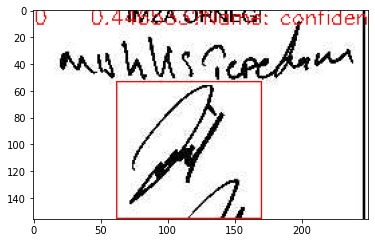

In [154]:

# Verify inference
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("inference/images/imza2.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


results = model(image) 
sonuc = results.pandas().xyxy[0]  # im predictions (pandas)
sonuc 
 
sinif = sonuc["class"] 
conf = sonuc["confidence"]
start_point = (int(sonuc["xmin"]),  int(sonuc["ymin"]))
end_point = (int(sonuc["xmax"]),  int(sonuc["ymax"]))
color = (255, 0, 0)
thickness = 1
lineType = cv2.LINE_4
org = (30, 30)
fontFace = cv2.FONT_HERSHEY_SIMPLEX

 
img_rect = cv2.rectangle(image, start_point, end_point, color, thickness, lineType)
cv2.putText(img_rect, str(conf), (0, 10), fontFace, 0.5,(255,0,0), 1)  #text,coordinate,font,size of text,color,thickness of font
plt.imshow(img_rect)
plt.show()



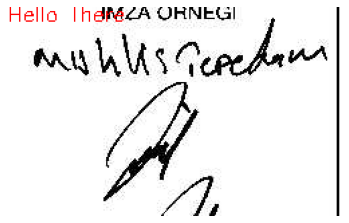

In [149]:
image2 = cv2.imread("inference/images/imza2.jpg")
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(image2,'Hello There', (0, 10), font, 0.5,(255,0,0), 1)  #text,coordinate,font,size of text,color,thickness of font

plt.axis("off")
plt.imshow(image2)
plt.show()